<a href="https://colab.research.google.com/github/Arshapjoy/Computer_vision/blob/main/notebooks/Img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi  #checking gpu

Tue Apr  2 06:52:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
import keras

In [5]:
keras.__version__

'2.15.0'

In [6]:
%pwd

'/content'

In [7]:
%cd /content/drive/MyDrive/data/Data

/content/drive/MyDrive/data/Data


In [8]:
%pwd

'/content/drive/MyDrive/data/Data'

In [9]:
%ls

train/  validation/


In [10]:
!unzip Data.zip

unzip:  cannot find or open Data.zip, Data.zip.zip or Data.zip.ZIP.


In [11]:
%ls

train/  validation/


In [12]:
#importing libraries and packages
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [13]:
IMAGE_SIZE= [224,224]

train_path="train"
valid_path="validation"


In [14]:
vgg16=VGG16(input_shape= IMAGE_SIZE+[3], weights="imagenet", include_top=False)

In [15]:
for layer in vgg16.layers:
  layer.trainable=False

In [16]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
folder=glob("train/*")

In [20]:
folder

['train/cats', 'train/dogs']

In [21]:
len(folder)

2

In [23]:
#Adding custom dense layers
model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [26]:
model.compile(
    loss="categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"]
)

In [28]:
#image processing

train_datagen=ImageDataGenerator(
    rescale = 1./255,       #image augmentation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True
)

test_datagen=ImageDataGenerator(rescale = 1./255)

In [31]:
#loading images

training_set=train_datagen.flow_from_directory(
    "train",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"

)



Found 557 images belonging to 2 classes.


In [34]:

test_set=test_datagen.flow_from_directory(
    "validation",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"

)

Found 140 images belonging to 2 classes.


In [35]:
history=model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/50
18/18 [==============================] - 27s 963ms/step - loss: 1.9713 - accuracy: 0.5404 - val_loss: 0.5373 - val_accuracy: 0.7857
Epoch 2/50
18/18 [==============================] - 12s 693ms/step - loss: 0.4205 - accuracy: 0.8294 - val_loss: 0.4047 - val_accuracy: 0.8143
Epoch 3/50
18/18 [==============================] - 12s 716ms/step - loss: 0.2685 - accuracy: 0.8959 - val_loss: 0.3718 - val_accuracy: 0.8143
Epoch 4/50
18/18 [==============================] - 13s 705ms/step - loss: 0.2015 - accuracy: 0.9318 - val_loss: 0.3821 - val_accuracy: 0.8071
Epoch 5/50
18/18 [==============================] - 13s 699ms/step - loss: 0.1651 - accuracy: 0.9461 - val_loss: 0.3763 - val_accuracy: 0.8286
Epoch 6/50
18/18 [==============================] - 13s 715ms/step - loss: 0.1226 - accuracy: 0.9641 - val_loss: 0.3909 - val_accuracy: 0.8143
Epoch 7/50
18/18 [==============================] - 13s 699ms/step - loss: 0.1051 - accuracy: 0.9713 - val_loss: 0.3968 - val_accuracy: 0.8143

In [37]:
history.history

{'loss': [1.9713014364242554,
  0.4204804301261902,
  0.2685401439666748,
  0.20149503648281097,
  0.16506606340408325,
  0.12259066104888916,
  0.10511933267116547,
  0.08163563162088394,
  0.10206165909767151,
  0.06538263708353043,
  0.04529900848865509,
  0.05208495631814003,
  0.047680485993623734,
  0.034588757902383804,
  0.03150523826479912,
  0.0329723097383976,
  0.021148720756173134,
  0.027367284521460533,
  0.013940921053290367,
  0.017899449914693832,
  0.014373150654137135,
  0.010317076928913593,
  0.009526235051453114,
  0.008166228421032429,
  0.008616774342954159,
  0.007628485560417175,
  0.006986647844314575,
  0.009473992511630058,
  0.008584045805037022,
  0.006574857514351606,
  0.003598799929022789,
  0.008447053842246532,
  0.003720012027770281,
  0.005899101961404085,
  0.00486154668033123,
  0.002410395536571741,
  0.0025074793957173824,
  0.0022806632332503796,
  0.003215053118765354,
  0.0036871442571282387,
  0.00737501448020339,
  0.0024607127998024225,


In [36]:
import matplotlib.pyplot as plt


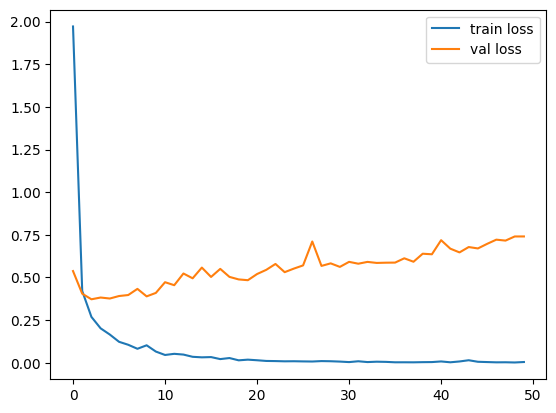

<Figure size 640x480 with 0 Axes>

In [39]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.show()
plt.savefig("Loss graph")

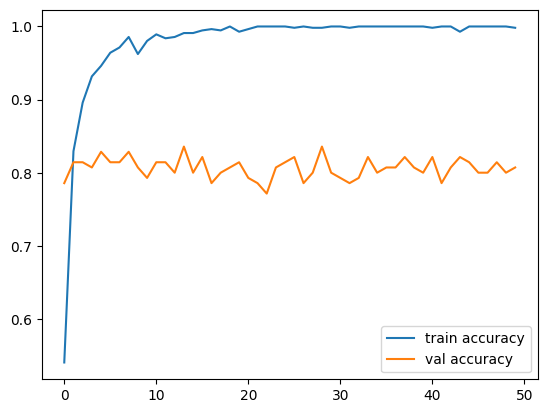

<Figure size 640x480 with 0 Axes>

In [40]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.legend()
plt.show()
plt.savefig("accuracy graph")

In [41]:
## save model

model.save("model_vgg16.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
#load model

from tensorflow.keras.models import load_model

model=load_model("model_vgg16.h5")


In [43]:
y_pred=model.predict(test_set)

5/5 [==============================] - 2s 236ms/step


In [44]:
y_pred

array([[9.52321947e-01, 4.76780087e-02],
       [3.42848226e-02, 9.65715230e-01],
       [9.99999166e-01, 8.49850380e-07],
       [2.87503796e-03, 9.97124970e-01],
       [9.99719918e-01, 2.80119391e-04],
       [4.03034985e-02, 9.59696472e-01],
       [6.71031415e-01, 3.28968585e-01],
       [9.32677448e-01, 6.73225448e-02],
       [1.89774039e-06, 9.99998093e-01],
       [7.78966935e-09, 1.00000000e+00],
       [9.99686360e-01, 3.13715747e-04],
       [9.93856609e-01, 6.14335947e-03],
       [9.91786182e-01, 8.21381807e-03],
       [1.18540390e-06, 9.99998808e-01],
       [2.92051467e-08, 1.00000000e+00],
       [9.99999881e-01, 9.35631164e-08],
       [2.77764548e-06, 9.99997258e-01],
       [1.61364136e-04, 9.99838591e-01],
       [5.26473708e-02, 9.47352648e-01],
       [2.42367779e-08, 1.00000000e+00],
       [6.58464924e-05, 9.99934196e-01],
       [7.54369484e-11, 1.00000000e+00],
       [9.99997735e-01, 2.28757244e-06],
       [6.65324330e-01, 3.34675670e-01],
       [2.374380

In [45]:
y_pred=np.argmax(y_pred, axis=1)

In [46]:
y_pred #alphbetical order 0,1,2,3,4

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [47]:
%ls

'accuracy graph.png'   cat_399.jpg   dog_92.jpg        model_vgg16.h5   validation/
 cat_170.jpg           dog_558.jpg  'Loss graph.png'   train/


In [87]:
#load test image

image_name="cat_399.jpg"

In [88]:
img=image.load_img(image_name, target_size=(224,224))


In [89]:
x=image.img_to_array(img)

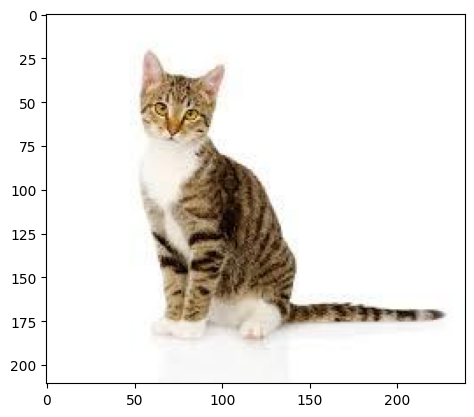

In [90]:
Z=plt.imread(image_name)
plt.imshow(Z)

In [91]:
x.shape

(224, 224, 3)

In [92]:
x=x/255

In [93]:
from keras.applications.vgg16 import preprocess_input

In [94]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [95]:
model.predict(img_data)

1/1 [==============================] - 0s 20ms/step


array([[0.9980336 , 0.00196645]], dtype=float32)

In [96]:
result=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 32ms/step


In [97]:
result

array([0])

In [98]:
if result[0]==1:
  prediction="Dog"
  print(prediction)
else:
  prediction="Cat"
  print(prediction)

Cat
